In [41]:
    import tensorflow as tf
    from tensorflow.keras.layers import Dense
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn
    from sklearn.model_selection import train_test_split

In [42]:
test_data = pd.read_csv('testData.txt', sep=',')
train_data = pd.read_csv('trainData.txt', sep=',')

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [44]:
print(test_data.shape)
print(train_data.shape)

(9752, 7)
(8143, 7)


In [45]:
X = train_data.iloc[:5000, 1:6]
Y = test_data.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [47]:
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu', input_shape=(5, ))) 
model.add(Dense(32, activation='softplus')) 
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                96        
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss_function = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= loss_function, metrics=['accuracy'])

In [49]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

32/32 [==============================] - 0s 957us/step - loss: 91.7200 - accuracy: 0.1960


In [50]:
prediction = model.predict(test_x)
test_prediction = np.argmax(prediction, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_prediction)
print(confusion_matrix)

32/32 [==============================] - 0s 820us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8325 - val_loss: 0.3963 - val_accuracy: 0.8067
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8386 - val_loss: 0.4219 - val_accuracy: 0.8292
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8282 - val_loss: 0.6989 - val_accuracy: 0.8025
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8393 - val_loss: 0.5349 - val_accuracy: 0.8258
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8232 - val_loss: 0.3881 - val_accuracy: 0.8083


Text(0, 0.5, 'Accuracy')

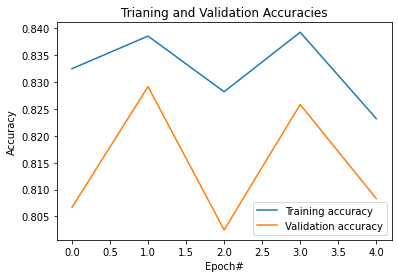

In [57]:
fit_model = model.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

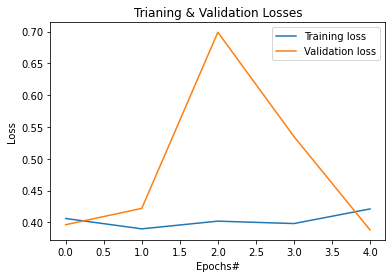

In [58]:
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing & Validation Losses')
plt.xlabel('Epochs#')
plt.ylabel('Loss')

In [59]:
test_prediction = model.predict(test_x)
test_prediction_label = np.argmax(test_prediction, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_prediction_label)
print('confusion Matrix\n', confusion_matrix)

32/32 [==============================] - 0s 798us/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


In [60]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus')) 
model2.add(Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                96        
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [61]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [36]:
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 2.2911 - accuracy: 0.7189 - val_loss: 0.5971 - val_accuracy: 0.7283
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.8029 - val_loss: 0.5417 - val_accuracy: 0.8017
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.8043 - val_loss: 0.4832 - val_accuracy: 0.7842
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8093 - val_loss: 0.5045 - val_accuracy: 0.8017
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8139 - val_loss: 0.4529 - val_accuracy: 0.8025


In [62]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 9.3321 - accuracy: 0.8040


In [63]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 874us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7925 - val_loss: 0.4439 - val_accuracy: 0.8042
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8157 - val_loss: 0.8142 - val_accuracy: 0.6000
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7875 - val_loss: 0.3997 - val_accuracy: 0.8192
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8204 - val_loss: 0.4037 - val_accuracy: 0.8200
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.8150 - val_loss: 0.4762 - val_accuracy: 0.8075


Text(0, 0.5, 'Accuracy')

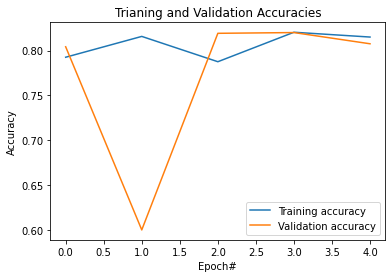

In [65]:
fit_model = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

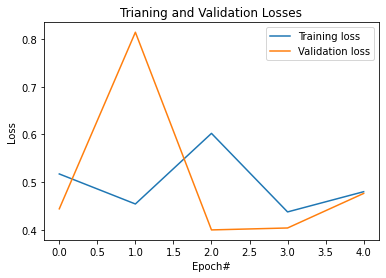

In [66]:
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

In [40]:
# Priyanka helped from priyanka in binary cross entropy and in confusion matrix